$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

**Preliminares:**

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

**1. Descargar e importar Heatmap_Utilities:**

In [ ]:
!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git

In [3]:
import os, sys
import nbimporter

sys.path.append(f'{os.getcwd()}/Heatmap_Utilities')
from Heatmap_Utilities.Main_Functions import read_csv, smooth, plot_heatmap

Otra forma es descargar Uniandes_Framework e importarlo de ahí:

In [ ]:
# !git clone https://github.com/Phenomenology-group-uniandes/Uniandes_Framework.git
# from Uniandes_Framework.heatmaps_utilities.functions import read_excel, smooth, plot_heatmap

**2. Usar las funciones importadas:**

In [4]:
Datasets = {}

Datasets['Data_1'] = read_csv(f'{os.getcwd()}/Heatmap_Utilities/Data_1.csv')
Datasets['Data_2'] = read_csv(f'{os.getcwd()}/Heatmap_Utilities/Data_2.csv')

Datasets es un directorio que contiene DataFrames usando las siguients keys:

In [4]:
Datasets.keys()

dict_keys(['Data_1', 'Data_2'])

Por ejemplo para llamar al DataFrame 'Data_5K_13_TeV/lq_lq' simplemente hay que hacer el siguiente comando:

In [5]:
Datasets['Data_1']

,250.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,2250.0,2500.0
3.00,564.500,19.0600,1.99800,0.344400,0.078620,0.021410,0.006597,0.002220,0.000798,0.000300
2.50,392.900,13.1800,1.38700,0.240700,0.054510,0.014890,0.004566,0.001541,0.000553,0.000210
2.00,250.900,8.4490,0.88960,0.153400,0.034900,0.009509,0.002923,0.000985,0.000354,0.000134
1.50,141.200,4.7490,0.49850,0.085600,0.019750,0.005363,0.001644,0.000554,0.000199,0.000075
1.00,62.810,2.1060,0.22170,0.038180,0.008740,0.002386,0.000731,0.000245,0.000089,0.000033
0.50,15.720,0.5278,0.05548,0.009582,0.002184,0.000595,0.000183,0.000062,0.000022,0.000008
0.25,3.929,0.1312,0.01380,0.002390,0.000547,0.000148,0.000046,0.000015,0.000006,0.000002


Con esto en mente analicemos algunos y veamos como usar la función smooth. Empecemos analizando datasets['Data_5K_13_TeV/lq_ta'], el DataFrame impreso en la linea de código anterior, grafiquemos su mapa de calor y tratemos de suavizarlo.

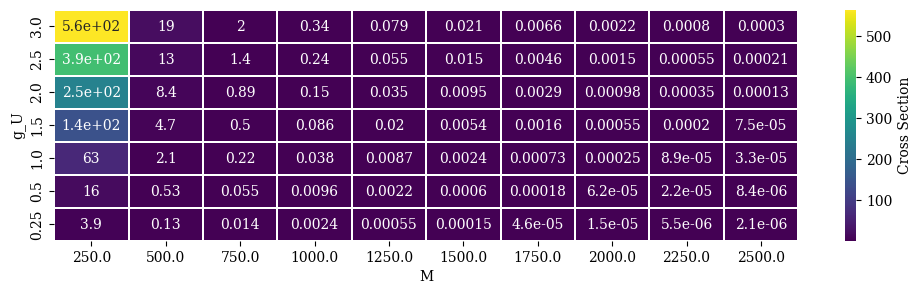

In [6]:
fig = plt.figure(figsize = (12,3))
sns.heatmap(Datasets['Data_1'], cmap ='viridis', linewidths = 0.2, annot = True, cbar_kws={'label': 'Cross Section'}).set(xlabel='M', ylabel='g_U')
plt.show()

Ahora, para ver este mismo mapa de calor pero de manera "continua" simplemente hay que utilizar las funciones smooth y plot_heatmap:

(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>, 0)

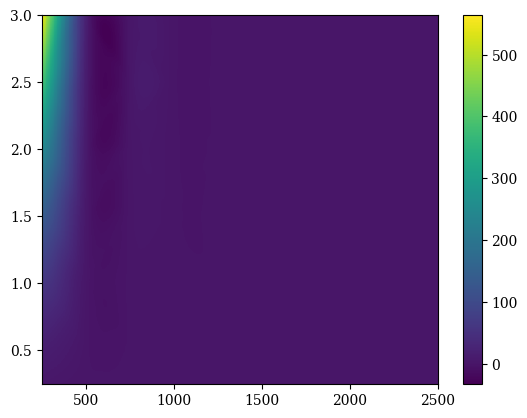

In [7]:
data_int = smooth(Datasets['Data_1'])
plot_heatmap(data_int)

Por otro lado, este mismo DataFrame en escala logaritmica: log10(Datasets['Data_5K_13_TeV/lq_ta']) se ve de la siguiente forma:

In [8]:
np.log10(Datasets['Data_1'])

,250.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,2250.0,2500.0
3.00,2.751664,1.280123,0.300595,-0.462937,-1.104467,-1.669383,-2.180654,-2.653647,-3.097997,-3.523168
2.50,2.594282,1.119915,0.142076,-0.618524,-1.263524,-1.827105,-2.340464,-2.812197,-3.257432,-3.678609
2.00,2.399501,0.926805,-0.050805,-0.814175,-1.457175,-2.021865,-2.534171,-3.006696,-3.451488,-3.873219
1.50,2.149835,0.676602,-0.302335,-1.067526,-1.704433,-2.270592,-2.784098,-3.256490,-3.700493,-4.122398
1.00,1.798029,0.323458,-0.654234,-1.418164,-2.058489,-2.622330,-3.136261,-3.610302,-4.051685,-4.475344
0.50,1.196453,-0.277531,-1.255864,-2.018544,-2.660747,-3.225337,-3.738499,-4.210349,-4.656001,-5.077067
0.25,0.594282,-0.882066,-1.860121,-2.621602,-3.261933,-3.829445,-4.338093,-4.813892,-5.258927,-5.681728


Y su mapa de calor se ve como:

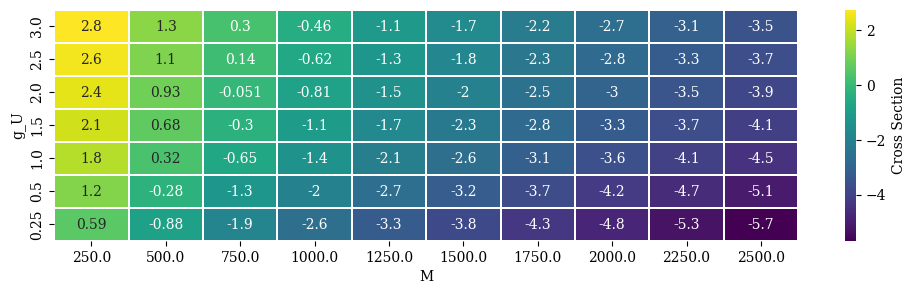

In [9]:
fig = plt.figure(figsize = (12,3))
sns.heatmap(np.log10(Datasets['Data_1']), cmap ='viridis', linewidths = 0.2, annot = True, cbar_kws={'label': 'Cross Section'}).set(xlabel='M', ylabel='g_U')
plt.show()

En muchos casos gracias a la diferencia de orden de magnitud que pueden tener los valores del DataFrame es importante pensar en analizar mejor usando una escala logaritmica. Por eso, si se quiere el mapa de calor suavizado usando escala logaritmica, una opción podría ser usar como parametro directamente np.log10(Datasets['Data_5K_13_TeV/lq_ta']), eso funcionaria; sin embargo, la función smooth tiene un parámetro opcional llamado log que cuando es True analiza los datos usando escala logaritmica, por lo que simplemente habría que hacer lo siguiente:

(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>, 0)

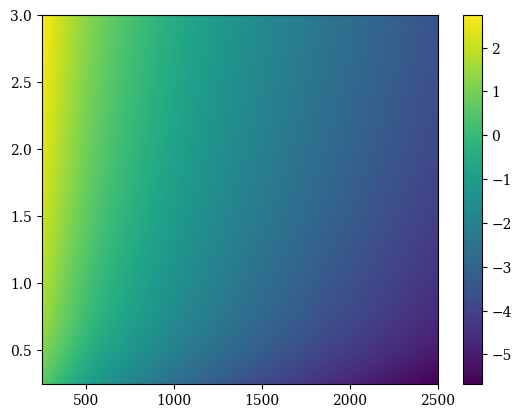

In [10]:
data_int = smooth(Datasets['Data_1'], log = True)
plot_heatmap(data_int)

Ahora veamos la utilidad de los otros parametros que tiene plot_heatmap, si queremos por ejemplo graficar curvas de nivel, simplemente tenemos que definir un diccionario de la siguiente forma:

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f0d21494100>)

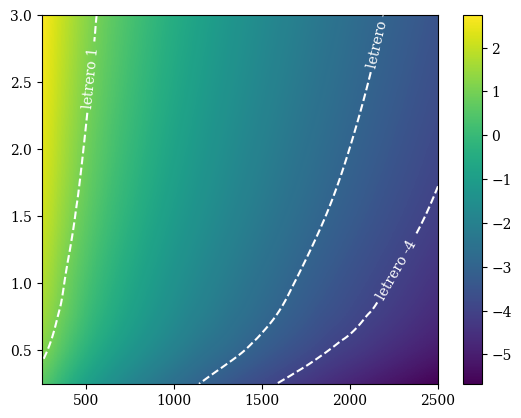

In [11]:
data_int = smooth(Datasets['Data_1'], log = True)

plot_heatmap(data_int, level_curves = {-3: 'letrero -3', -4: 'letrero -4', 1: 'letrero 1'})

Notemos que en este caso el letrero -3 no se puede leer bien, esto no siempre sucede, a veces automaticamente salen bien. No obstante, cuando eso suceda se puede ingresar el parametro level_curves_label_location con las coordenadas aproximadas (cerca a la curva) en que queremos cada letrero.

Por ejemplo en este caso uno a simple vista podría pensar que las posiciones (500,1), (2000, 0.5) y (1500,0.7) estan cerca de donde deberían ir los letreros, así que basta con añadir el parametro level_curves_labels_locations = [(500,1), (2000, 0.5), (1500,0.7)] dentro de la función plot_heatmap:

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f0d21555ab0>)

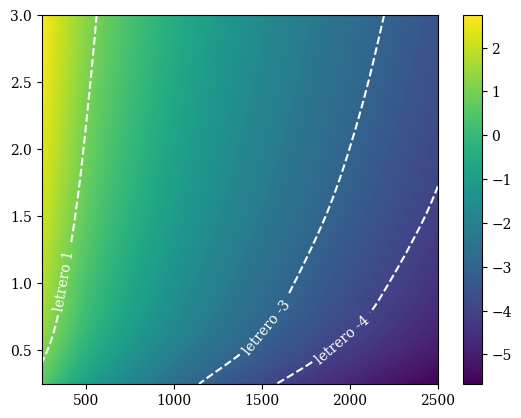

In [12]:
plot_heatmap(Data = smooth(Datasets['Data_1'], log = True), 
            level_curves = {-3: 'letrero -3', -4: 'letrero -4', 1: 'letrero 1'}, 
            level_curves_labels_locations = [(500,1), (2000, 0.5), (1500,0.7)])

$\textbf{Nota:}$ No importa el orden en que los escribamos, lo que hace esto es que matplotlib se basará en esas posiciones sugeridas para acomodar los letreros. Es decir que poner level_curves_labels_locations = [(500,1), (2000, 0.5), (1500,0.7)] es exactamente lo mismo a level_curves_labels_locations = [(2000, 0.5), (1500,0.7),(500,1)], esto no confunde los letreros ni nada por el estilo.

De hecho si queremos tener los (x,y) de las curvas basta con analizar los outputs de la función:

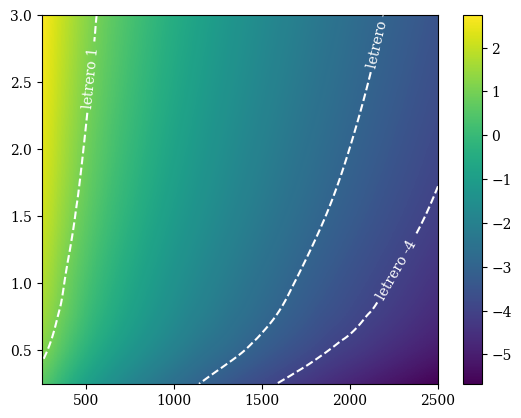

In [13]:
data_int = smooth(Datasets['Data_1'], log = True)

fig, ax, curves = plot_heatmap(data_int, level_curves = {-3: 'letrero -3', -4: 'letrero -4', 1: 'letrero 1'})

In [14]:
#Curva de -4
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

#Curva de -3
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

#Curva de 1
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

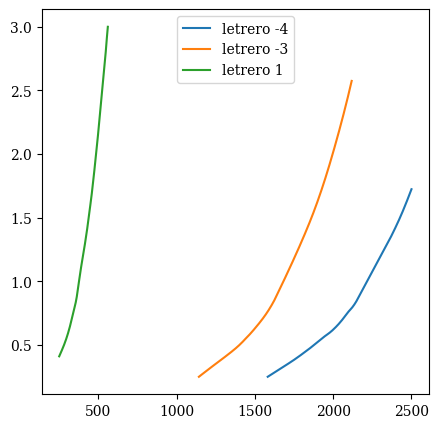

In [15]:
fig = plt.figure(figsize = (5,5))

plt.plot(x1,y1, label = 'letrero -4')
plt.plot(x2,y2, label = 'letrero -3')
plt.plot(x3,y3, label = 'letrero 1')

plt.legend(loc = 'best')

Volviendo a la función plot_heatmap. También se puede usar para graficar las curvas incluso si la dimension de uno de los dos ejes es 1.

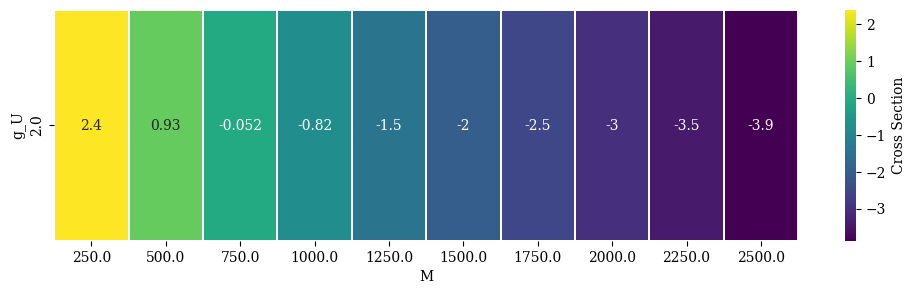

In [16]:
fig = plt.figure(figsize = (12,3))
sns.heatmap(np.log10(Datasets['Data_2']), cmap ='viridis', linewidths = 0.2, annot = True, cbar_kws={'label': 'Cross Section'}).set(xlabel='M', ylabel='g_U')
plt.show()

(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>, 0)

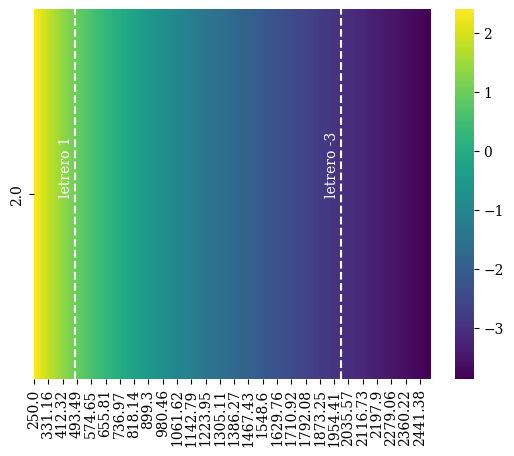

In [17]:
data_int = smooth(Datasets['Data_2'], log = True)
plot_heatmap(data_int, level_curves= {-3: 'letrero -3', 1: 'letrero 1'})

Por otro lado, otro parametro que posee plot_heatmap nos permite hacer zooms, para usarlo simplemente tenemos que ingresar otro diccionario a la función.

Un diccionario que contenga (x1,y1) y (x2,y2) la esquina inferior izquierda y la esquina superior derecha del cuadrante al cual queremos hacerle zoom

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f0d204eceb0>)

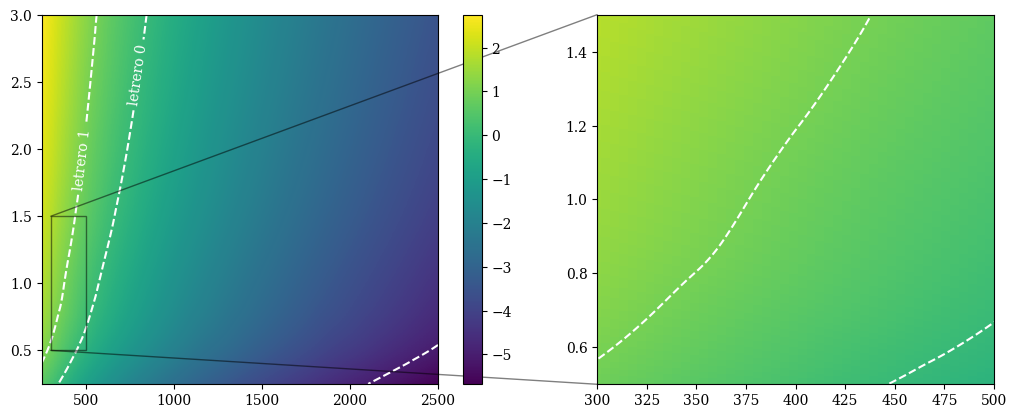

In [18]:
plot_heatmap(Data = smooth(Datasets['Data_1'], log = True), 
            level_curves = {1 : 'letrero 1', 0: 'letrero 0', -5 : 'letrero -5'}, 
            zoom_region = {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5})

$\textbf{Nota:}$ no se puede hacer zoom a un Dataframe donde uno de los ejes es de dimensión 1 ya que en ese caso no hay forma de considerar un cuadrante

Para editar los labels o el color de la gráfica basta con usar los parametros opcionales (title, title_right, title_left, x_label, y_label, cbar_label, color), estos como su nombre lo dicen permiten cambiar los labels de la grafica y el color con que se grafica (se pueden consultar los colores posibles en https://matplotlib.org/stable/gallery/color/colormap_reference.html).

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'left':'title_left','center':'title','right':'title_right'}, xlabel='x_label', ylabel='y_label'>,
 <matplotlib.contour.QuadContourSet at 0x7f0d204265c0>)

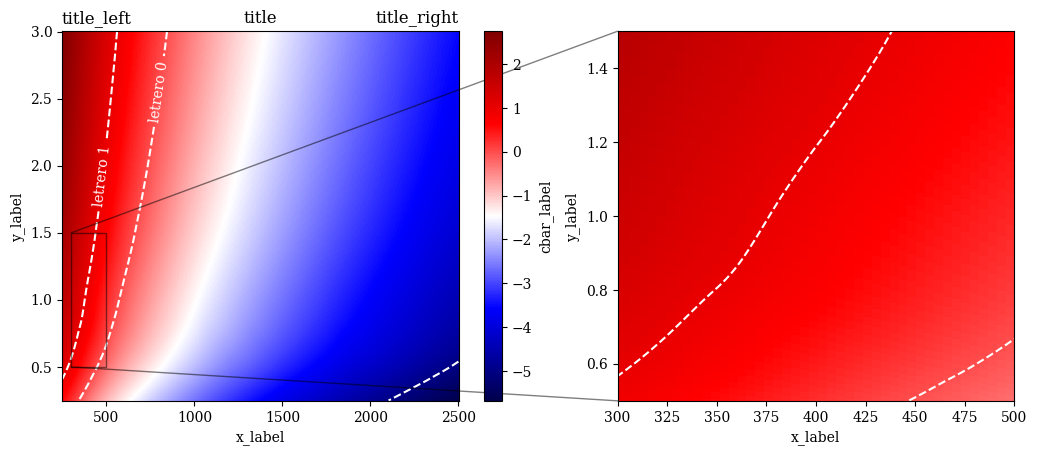

In [19]:
plot_heatmap(Data = smooth(Datasets['Data_1'], log = True), 
            level_curves= {1 : 'letrero 1', 0: 'letrero 0', -5 : 'letrero -5'}, 
            zoom_region= {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5}, 
            title = 'title', 
            title_right = 'title_right', 
            title_left = 'title_left', 
            x_label = 'x_label',
            y_label =  'y_label',
            cbar_label = 'cbar_label',
            color = 'seismic')

Dentro del directorio titulo se puede definir una 'key' opcional, esta es titulo_derecha y permite poner una nota en la esquina superior derecha de la grafica:

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'left':'title_left','center':'title','right':'title_right'}, xlabel='x_label', ylabel='y_label'>,
 <matplotlib.contour.QuadContourSet at 0x7f0d201539d0>)

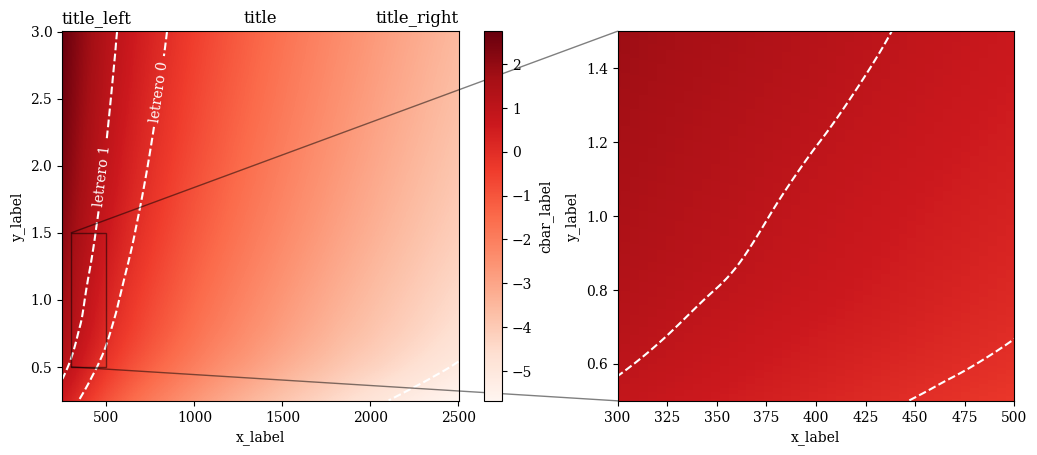

In [20]:
plot_heatmap(Data = smooth(Datasets['Data_1'], log = True), 
            level_curves= {1 : 'letrero 1', 0: 'letrero 0', -5 : 'letrero -5'}, 
            zoom_region= {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5}, 
            title = 'title', 
            title_right = 'title_right', 
            title_left = 'title_left', 
            x_label = 'x_label',
            y_label =  'y_label',
            cbar_label = 'cbar_label',
            color = 'Reds')

Por último, para guardar la grafica basta usar el parametro File_name con el nombre que se le asigne

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'left':'title_left','center':'title','right':'title_right'}, xlabel='x_label', ylabel='y_label'>,
 <matplotlib.contour.QuadContourSet at 0x7f0d12b9d150>)

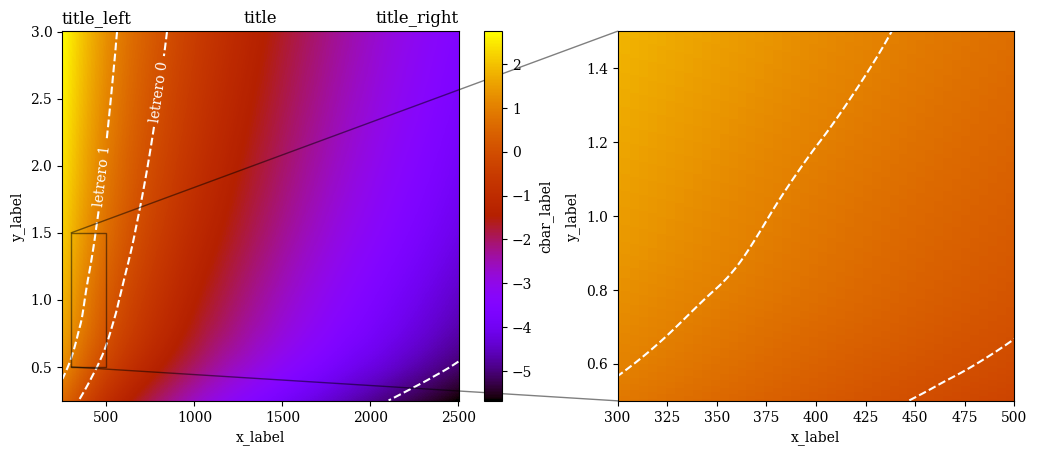

In [21]:
plot_heatmap(Data = smooth(np.log10(Datasets['Data_1'])), 
            level_curves= {1 : 'letrero 1', 0: 'letrero 0', -5 : 'letrero -5'}, 
            zoom_region= {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5}, 
            title = 'title', 
            title_right = 'title_right', 
            title_left = 'title_left',             
            x_label = 'x_label',
            y_label =  'y_label',
            cbar_label = 'cbar_label',
            color = 'gnuplot',
            File_name = 'grafica.png')

$\textrm{Nota:}$ Siempre se deben usar las mismas keys para los diccionarios de los titulos (x_label, y_label y cbar_label) y el zoom (x1, y1, x2 y y2), ya que con esas keys es que el código los lee. No obstante, para el diccionario curvas_de_nivel se usan como keys los valores en que se quieren hacer los contornos y la variable que se asocia a esas keys es el letrero que se quiere graficar.